## hello and welcome to the rscha2d model! mamma mia!

pomelo! mamma mia! spaghetti!

In [1]:
import numpy

import rscha2d
import fibonacci_sphere
import trig
import constants
import coords
import gauge

from matplotlib import pyplot, colors, ticker
%matplotlib nbagg

In [2]:
#styles
style_hist_good = {"color" : "C0", "edgecolor" : "white"}
style_hist_bad = {"color" : "C3", "edgecolor" : "white"}

In [3]:
lat_c = 42.0
lon_c = 20.0
theta_c, phi_c, theta_0d, theta_0 = numpy.deg2rad((90-lat_c, lon_c, 26.0, 50.0))
knots_bd = numpy.arange(-2100, 2050, 50)

lo primero es filtrar y eso. criterios:
- error demasiado big (en t y en valor)
- 3+ sigmas de distancia al modelo (al sha.dif? a este?)

In [4]:
t_err_max = 250
t_min = -2250

In [5]:
model = rscha2d.Model()
model.set_model_params(theta_c, phi_c, theta_0d,
                       cap_edge=0, kmax_int=3, kmax_ext=3, m_max=2, g10_ref=-30,
                       knots=knots_bd,
                       spatial_reg=1e-4, temporal_reg=1e-2)

In [6]:
model.add_data("../data/rscha2d/GlobalDatabase-11Mayo2017.dat")

1096


In [7]:
import geofield
import xyzfield

sha = geofield.SHADIFData("../data/sha.dif.14k/coeff_SHA.DIF.14k.dat",
                          "../data/sha.dif.14k/error_coef_EPSL_tnmgh.dat")

import scipy
g_interp = scipy.interpolate.interp1d(
    sha.years, sha.gcomp, axis=0, kind="cubic", fill_value="extrapolate")(model.tv)

D_shadif = numpy.empty_like(model.tv)
I_shadif = numpy.empty_like(model.tv)
F_shadif = numpy.empty_like(model.tv)

for i, (year, theta, phi) in enumerate(zip(model.tv, model.thetav, model.phiv)):
    dec,inc,f,h = xyzfield.xyz2difh(*xyzfield.xyzfieldv2(g_interp[i, :],
                                                         numpy.atleast_1d(phi),
                                                         numpy.atleast_1d(theta)))
    D_shadif[i] = dec
    I_shadif[i] = inc
    F_shadif[i] = f
    

In [8]:
name_at = "Paris"
theta_at, phi_at = numpy.deg2rad((90-48.8, 2.35))

<IPython.core.display.Javascript object>


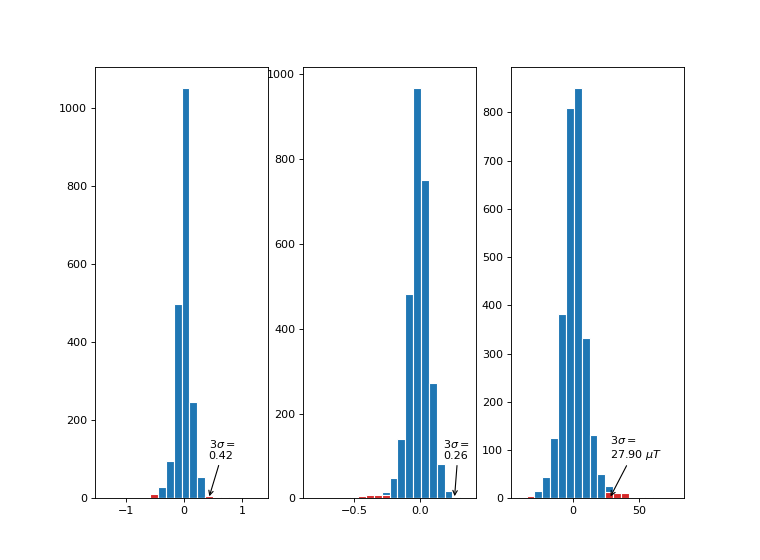

In [9]:
fig, axes = pyplot.subplots(1, 3, figsize=(9.5,7))

D_res = trig.mindiff(model.D_o, D_shadif)
I_res = trig.mindiff(model.I_o, I_shadif)
F_res = model.F_o - F_shadif

D_std = numpy.std(D_res[~numpy.isnan(D_res)])
I_std = numpy.std(I_res[~numpy.isnan(I_res)])
F_std = numpy.std(F_res[~numpy.isnan(F_res)])

axes[0].hist(D_res[~numpy.isnan(D_res)], bins=20, **style_hist_good)
axes[0].hist(D_res[numpy.abs(D_res) > 3*D_std], bins=20, **style_hist_bad)
axes[1].hist(I_res[~numpy.isnan(I_res)], bins=20, **style_hist_good)
axes[1].hist(I_res[numpy.abs(I_res) > 3*I_std], bins=20, **style_hist_bad)
axes[2].hist(F_res[~numpy.isnan(F_res)], bins=20, **style_hist_good)
axes[2].hist(F_res[numpy.abs(F_res) > 3*F_std], bins=20, **style_hist_bad)

axes[0].annotate(f"$3\sigma=$ \n{3*D_std:4.2f}", xy=(3*D_std, 0), xytext=(0, 35),
                 arrowprops={"arrowstyle" : "->"}, textcoords="offset points")
axes[1].annotate(f"$3\sigma=$ \n{3*I_std:4.2f}", xy=(3*I_std, 0), xytext=(-10, 35),
                 arrowprops={"arrowstyle" : "->"}, textcoords="offset points")
axes[2].annotate(f"$3\sigma=$ \n{3*F_std:4.2f} $\mu T$", xy=(3*F_std, 0), xytext=(0, 35),
                 arrowprops={"arrowstyle" : "->"}, textcoords="offset points")

pyplot.show(fig)

In [10]:
inliers = model.ids[~((numpy.abs(D_res) > 3*D_std) |
                    (numpy.abs(I_res) > 3*I_std) |
                    (numpy.abs(F_res) > 3*F_std) |
                    (model.t_err > 250))]

In [11]:
f = open("../data/rscha2d/GlobalDatabase-11Mayo2017.dat", "r")
f2 = open("../data/rscha2d/filtered_11-05-2017.dat", "w")
    
for i, line in enumerate(f):
    if i in inliers:
        f2.write(line)

In [12]:
f.close()
f2.close()

In [13]:
model2 = rscha2d.Model()
model2.set_model_params(theta_c, phi_c, theta_0d,
                        cap_edge=0, kmax_int=3, kmax_ext=3, m_max=2, g10_ref=-30,
                        knots=knots_bd,
                        spatial_reg=1e-4, temporal_reg=1e-2)

In [14]:
model2.add_data("../data/rscha2d/filtered_11-05-2017.dat")

237


In [15]:
import geofield
import xyzfield

sha = geofield.SHADIFData("../data/sha.dif.14k/coeff_SHA.DIF.14k.dat",
                          "../data/sha.dif.14k/error_coef_EPSL_tnmgh.dat")

import scipy
g_interp = scipy.interpolate.interp1d(
    sha.years, sha.gcomp, axis=0, kind="cubic", fill_value="extrapolate")(model2.tv)

D_shadif = numpy.empty_like(model2.tv)
I_shadif = numpy.empty_like(model2.tv)
F_shadif = numpy.empty_like(model2.tv)

for i, (year, theta, phi) in enumerate(zip(model2.tv, model2.thetav, model2.phiv)):
    dec,inc,f,h = xyzfield.xyz2difh(*xyzfield.xyzfieldv2(g_interp[i, :],
                                                         numpy.atleast_1d(phi),
                                                         numpy.atleast_1d(theta)))
    D_shadif[i] = dec
    I_shadif[i] = inc
    F_shadif[i] = f

<IPython.core.display.Javascript object>


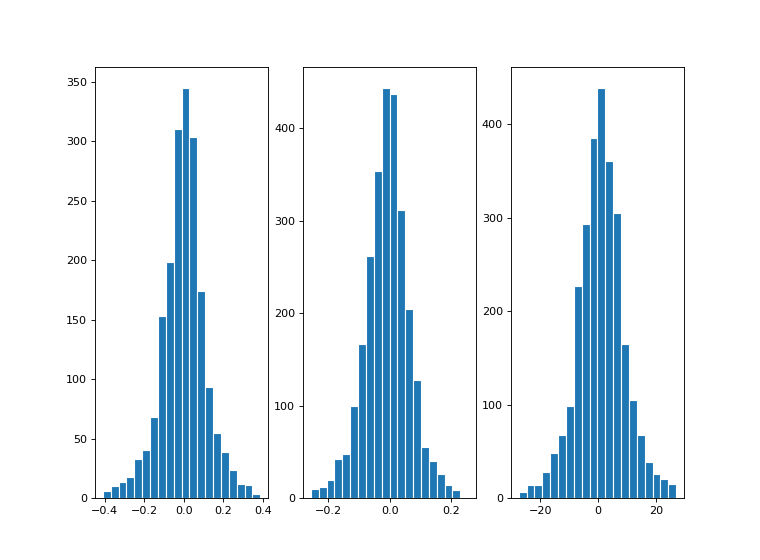

In [16]:
fig, axes = pyplot.subplots(1, 3, figsize=(9.5,7))

D_res = trig.mindiff(model2.D_o, D_shadif)
I_res = trig.mindiff(model2.I_o, I_shadif)
F_res = model2.F_o - F_shadif

axes[0].hist(D_res[~numpy.isnan(D_res)], bins=20, **style_hist_good)
axes[1].hist(I_res[~numpy.isnan(I_res)], bins=20, **style_hist_good)
axes[2].hist(F_res[~numpy.isnan(F_res)], bins=20, **style_hist_good)

pyplot.show(fig)

- the bad data was thrusted into ***oblivion*** ha ha
- cool and nice histogramos

In [17]:
model2.set_model_params(theta_c, phi_c, theta_0d,
                        cap_edge=0, kmax_int=3, kmax_ext=3, m_max=2, g10_ref=-30,
                        knots=knots_bd,
                        spatial_reg=1e-4, temporal_reg=1e-2)

In [18]:
solution = model2.solve(complete=True)
g = solution["coefs"]

________________________________________________________________________________
[Memory] Calling rscha_r.rscha_condition_matrix_dif...
rscha_condition_matrix_dif(( array([ 0.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.]),
  array([ 0.,  1., -1.,  0.,  2., -2.,  1., -1.,  3., -3.]),
  array([  1.164403e-12,   3.646726e+00,   3.646726e+00,   7.958865e+00,
         6.368397e+00,   6.368397e+00,   1.127449e+01,   1.127449e+01,
         8.955337e+00,   8.955337e+00])), 
( array([ 1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.]),
  array([ 1., -1.,  0.,  2., -2.,  1., -1.,  3., -3.]),
  array([  3.646726,   3.646726,   7.958865,   6.368397,   6.368397,
        11.274494,  11.274494,   8.955337,   8.955337])), 
array([ 0,  1, -1,  2, -2]), array([ 6366.087515, ...,  6362.226307]), array([ 0.264736, ...,  0.210847]), array([ 1.289396, ..., -2.587089]), 0.4537856055185257, array([ 11.227893, ..., -14.332809]), array([ 21.417454, ..., -11.738446]), array([ 35.50927 , ...,  47.192349]), 47.09856310

In [19]:
solution

{'coefs': array([-2.59157868,  0.23731596, -0.01412898, ..., -0.05411909,
         0.13534066, -0.02117253]),
 'coefs_reversed': array([-2.59157868, -2.21671882, -1.82963014, ..., -0.03287288,
        -0.01594409, -0.02117253]),
 'norm_s': 85003.627588091738,
 'norm_t': 230.60090963885011}

#### lets make a big curve

In [20]:
name_at = "Paris"
theta_at, phi_at = numpy.deg2rad((90-48.8, 2.35))

In [21]:
import importlib; importlib.reload(trig)

<module 'trig' from '/home/josecper/Programs/python/trig.py'>

In [22]:
near = (trig.angulardist(theta_at, phi_at, model2.thetav, model2.phiv) 
        < numpy.arctan(900/constants.a_r))

D_reloc, I_reloc, F_reloc = trig.relocate(model2.D_o, model2.I_o, model2.F_o,
                                          model2.thetav, model2.phiv, theta_at, phi_at)

In [23]:
t_cur = numpy.linspace(-2000, 2000, 400)
t_cur, r_cur, theta_cur, phi_cur = coords.curve_at(t_cur, constants.a_r, theta_at, phi_at)
D_cur_bd, I_cur_bd, F_cur_bd = model.synth_data(t_cur, r_cur, theta_cur, phi_cur, g)

________________________________________________________________________________
[Memory] Calling rscha_r.rscha_condition_matrix_dif...
rscha_condition_matrix_dif(( array([ 0.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.]),
  array([ 0.,  1., -1.,  0.,  2., -2.,  1., -1.,  3., -3.]),
  array([  1.164403e-12,   3.646726e+00,   3.646726e+00,   7.958865e+00,
         6.368397e+00,   6.368397e+00,   1.127449e+01,   1.127449e+01,
         8.955337e+00,   8.955337e+00])), 
( array([ 1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.]),
  array([ 1., -1.,  0.,  2., -2.,  1., -1.,  3., -3.]),
  array([  3.646726,   3.646726,   7.958865,   6.368397,   6.368397,
        11.274494,  11.274494,   8.955337,   8.955337])), 
array([ 0,  1, -1,  2, -2]), array([ 6371.2, ...,  6371.2]), array([ 0.245882, ...,  0.245882]), array([-2.179337, ..., -2.179337]), 0.4537856055185257, array([-7.475448, ..., -7.475448]), array([-18.292138, ..., -18.292138]), array([ 45.144895, ...,  45.144895]), 47.087958499499621)
___

<IPython.core.display.Javascript object>


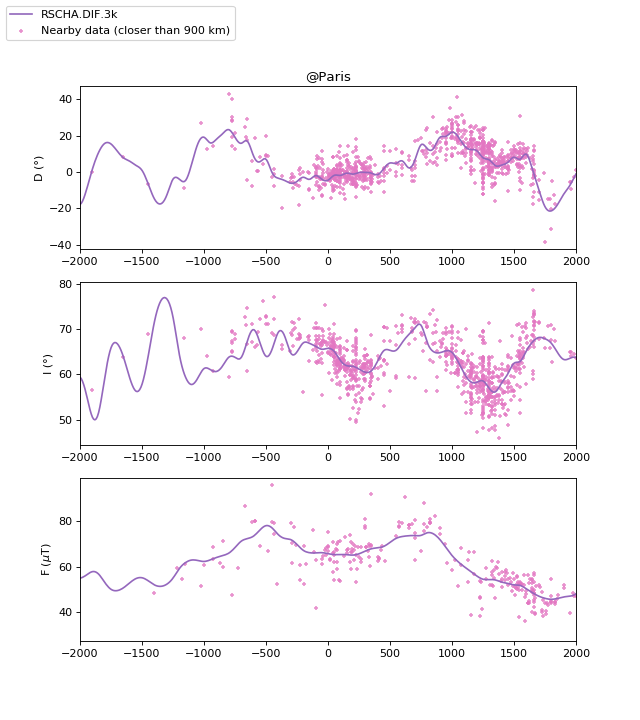

In [24]:
fig, (ax0, ax1, ax2) = pyplot.subplots(3,1, figsize=(8,9))

common={"marker" : "+", "s" : 8, "alpha" : 0.8, "color" : "C6"}
sha_style = {"color" : "C6", "linestyle" : "--"}
rscha_style = {"color" : "C4"}


ax0.scatter(model2.tv[near], numpy.rad2deg(D_reloc)[near],
            label="Nearby data (closer than 900 km)", **common)
#ax0.plot(years, D_shadif, label="SHA.DIF.14k", **sha_style)
ax0.plot(t_cur, numpy.rad2deg(D_cur_bd), **rscha_style, label="RSCHA.DIF.3k")
ax0.set_ylabel("D (°)")


#ax1.plot(years, I_shadif, **sha_style)
ax1.scatter(model2.tv[near], numpy.rad2deg(I_reloc)[near], **common)
ax1.plot(t_cur, numpy.rad2deg(I_cur_bd), **rscha_style)
ax1.set_ylabel("I (°)")


ax2.scatter(model2.tv[near], F_reloc[near], **common)
#ax2.plot(years, F_shadif, **sha_style)
ax2.plot(t_cur, F_cur_bd, **rscha_style)
ax2.set_ylabel("F ($\mu $T)")

ax0.set_title("@{}".format(name_at))

for ax in (ax0, ax1, ax2):
    ax.set_xbound(-2000, 2000)
    
fig.legend(*ax0.get_legend_handles_labels(), loc="upper left")